# Belajar Pengembangan Machine Learning - Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

## Data Diri

Nama : Adi Bintang Pradana <br>
Alamat : Jl. Budi Mulia No. 1, Jakarta <br>
No. HP : 087784537428 <br>
Email : adibintangprada@gmail.com

## Import Library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras import optimizer_v2

## Load Dataset

In [49]:
df = pd.read_csv('BBCA.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-06-08,875.0,900.0,875.0,887.5,553.706055,99830000.0
1,2004-06-09,887.5,912.5,875.0,900.0,561.505005,58858000.0
2,2004-06-10,900.0,900.0,887.5,900.0,561.505005,33118000.0
3,2004-06-11,887.5,900.0,887.5,900.0,561.505005,27166000.0
4,2004-06-14,900.0,900.0,875.0,887.5,553.706055,31708000.0


## Data Cleaning and Preprocessing

### Handling Missing Value

In [50]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Handling Inconsistent Data Type

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4244 entries, 0 to 4244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4244 non-null   datetime64[ns]
 1   Open       4244 non-null   float64       
 2   High       4244 non-null   float64       
 3   Low        4244 non-null   float64       
 4   Close      4244 non-null   float64       
 5   Adj Close  4244 non-null   float64       
 6   Volume     4244 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 265.2 KB


### Visualizing Target Data (BBCA Close Price)

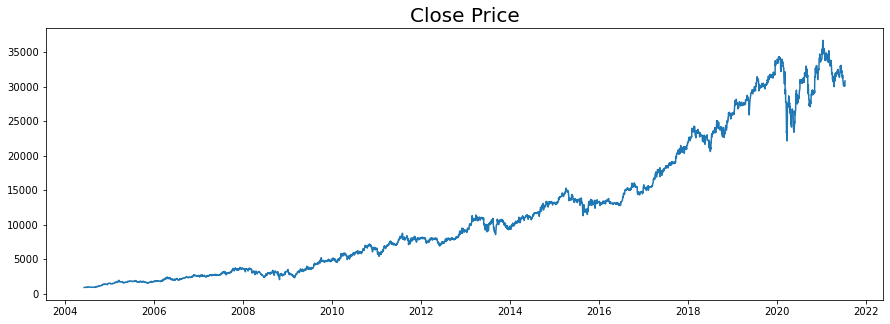

In [55]:
dates = df['Date'].values
close  = df['Close'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, close)
plt.title('Close Price',
          fontsize=20);

### Generating Training Data (80% Training Data)

In [56]:
training_data_len = int(np.ceil( len(close) * .8 ))

training_data_len

3396

### Feature Scalling

In [57]:
close = close.reshape(-1, 1)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close)

scaled_close

array([[0.00000000e+00],
       [3.48796652e-04],
       [3.48796652e-04],
       ...,
       [8.14440181e-01],
       [8.15137775e-01],
       [8.36065574e-01]])

### Split the Data Into x_train and y_train

In [59]:
train_data = scaled_close[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.        , 0.0003488 , 0.0003488 , 0.0003488 , 0.        ,
       0.00069759, 0.0003488 , 0.        , 0.        , 0.        ,
       0.        , 0.0003488 , 0.0003488 , 0.00069759, 0.00069759,
       0.00104639, 0.00139519, 0.        , 0.0003488 , 0.0003488 ,
       0.00139519, 0.00139519, 0.00139519, 0.00174398, 0.00174398,
       0.00209278, 0.00139519, 0.00139519, 0.00174398, 0.00174398,
       0.00174398, 0.00174398, 0.00174398, 0.00174398, 0.00139519,
       0.00139519, 0.00139519, 0.00139519, 0.00139519, 0.00104639,
       0.00139519, 0.00174398, 0.00174398, 0.00139519, 0.00069759,
       0.00069759, 0.00104639, 0.00069759, 0.00069759, 0.0003488 ,
       0.0003488 , 0.00104639, 0.00104639, 0.00069759, 0.00069759,
       0.00069759, 0.0003488 , 0.0003488 , 0.00069759, 0.        ])]
[0.000348796651552144]

[array([0.        , 0.0003488 , 0.0003488 , 0.0003488 , 0.        ,
       0.00069759, 0.0003488 , 0.        , 0.        , 0.        ,
       0.        , 0.0003488 , 0.0

## Creating Model Architecture

In [60]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

## Model Compiling

In [61]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [62]:
model.compile(optimizer = adam,
              loss='mean_squared_error', 
              metrics=['mae'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


## Defining Callback, Best Model Checkpoint, and Early Stopping (If Needed)

In [65]:
filepath= "BBCA_timeseries.h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='mae', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max', 
                             save_weights_only=False)

early_stopping = EarlyStopping(monitor='mae',
                               min_delta = 0, 
                               patience = 5, 
                               verbose = 1, 
                               restore_best_weights=True)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.1):
      print("\nMAE telah mencapai <10%")
      self.model.stop_training = True
callbacks = myCallback()

callback_params = [checkpoint,
                   early_stopping,
                   callbacks]

## Run the Model

In [66]:
hist = model.fit(x_train, y_train, 
                 batch_size=1, 
                 epochs=100,
                 callbacks=callback_params)

Epoch 1/100
3336/3336 [==============================] - 191s 56ms/step - loss: 2.8226e-04 - mae: 0.0110

Epoch 00001: mae improved from -inf to 0.01103, saving model to BBCA_timeseries.h5

MAE telah mencapai <10%


In [67]:
best_model = tf.keras.models.load_model("BBCA_timeseries.h5")

## Loss and MAE Visualization

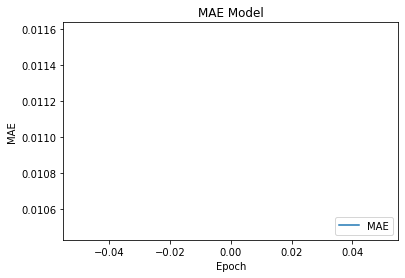

In [68]:
plt.plot(hist.history['mae'])
plt.title('MAE Model')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['MAE'], loc='lower right')
plt.show()

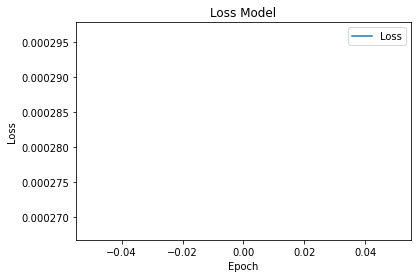

In [69]:
plt.plot(hist.history['loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()

There is no mae and loss visualization because the model already reached MAE<10% in 1 epoch